In [1]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

Current Working Dir:  C:\git\Springboard-Public\Capstone Project 2\notebooks
Root Path:  C:/git/Springboard-Public/Capstone Project 2/


In [2]:
from modules.lib.StandardTraining import *
from modules.models.ResNet import ResNet_PreTrained_12_Out

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [3]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [4]:
net = ResNet_PreTrained_12_Out(layers=18, drop_out_precent=0.5) #18, 34, 50, 101, 152

net = nn.DataParallel(net)
net.to(device)

image_width=224
image_height=224

# Since the model and not the data loader repeats the grayscale channel, 
#  we want the summary input shape as grayscale
summary(net, (1, image_width, image_height)) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [5]:
standardTraining = StandardTraining(number_images=0, 
                                     batch_size=64, 
                                     learning_rate=1e-4, 
                                     num_epochs=20,
                                     device=device, 
                                     net=net,
                                     use_positivity_weights=False,
                                     image_width = image_width,
                                     image_height = image_height,
                                     affineDegrees=15,
                                     translatePrecent=0.1, 
                                     shearDegrees=1, 
                                     brightnessJitter=0.3, 
                                     contrastJitter=0.2, 
                                     augPercent=0.25)

Number of Training Images: 105,614
Number of Validation Images: 26,134


In [6]:
standardTraining.train()

▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [1/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 479.2177         
Time of Completion: 2020-07-21 22:33:02.779819          
Training Time: 0:11:34.771057          
Validation Time: 0:02:00.898830

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11887,0.176495,0.573851,0.269961,0.799751,0.386640
4,Edema,24392,0.325886,0.570311,0.414767,0.790499,0.504167
5,Consolidation,6386,0.001096,0.046980,0.002142,0.665088,0.102526
7,Atelectasis,16479,0.009649,0.255217,0.018594,0.633960,0.221627
9,Pleural_Effusion,35805,0.610864,0.685750,0.646145,0.834840,0.711781



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2958,0.306288,0.637579,0.413793,0.856534,0.503989
4,Edema,6107,0.551662,0.530468,0.540857,0.818239,0.553563
5,Consolidation,1537,0.000000,0.000000,0.000000,0.715957,0.125067
7,Atelectasis,4139,0.000000,0.000000,0.000000,0.677712,0.268423
9,Pleural_Effusion,8929,0.609251,0.754403,0.674102,0.870026,0.770086


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [2/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 446.8992         
Time of Completion: 2020-07-21 22:46:29.747773          
Training Time: 0:11:28.142582          
Validation Time: 0:01:57.924779

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11887,0.276100,0.632248,0.384354,0.851448,0.490734
4,Edema,24392,0.396236,0.609587,0.480284,0.824429,0.562485
5,Consolidation,6386,0.001096,0.259259,0.002183,0.716377,0.135278
7,Atelectasis,16479,0.006979,0.383333,0.013708,0.674230,0.255794
9,Pleural_Effusion,35805,0.667784,0.723318,0.694442,0.869034,0.767145



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2958,0.265382,0.666384,0.379594,0.860246,0.517207
4,Edema,6107,0.346979,0.643682,0.450899,0.828587,0.573261
5,Consolidation,1537,0.000000,0.000000,0.000000,0.727980,0.137499
7,Atelectasis,4139,0.002416,0.666667,0.004815,0.686205,0.275280
9,Pleural_Effusion,8929,0.594019,0.767472,0.669697,0.875428,0.778668


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [3/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 434.2561         
Time of Completion: 2020-07-21 22:59:57.095677          
Training Time: 0:11:28.315115          
Validation Time: 0:01:58.146188

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11887,0.314125,0.649730,0.423500,0.864559,0.519492
4,Edema,24392,0.427148,0.626933,0.508108,0.837464,0.589203
5,Consolidation,6386,0.003445,0.333333,0.006820,0.733359,0.152565
7,Atelectasis,16479,0.012622,0.453159,0.024560,0.691826,0.275096
9,Pleural_Effusion,35805,0.689485,0.735652,0.711820,0.879026,0.783586



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2958,0.334009,0.642393,0.439502,0.867096,0.532616
4,Edema,6107,0.420174,0.630777,0.504373,0.836134,0.589434
5,Consolidation,1537,0.003904,0.333333,0.007717,0.722611,0.141905
7,Atelectasis,4139,0.014738,0.488000,0.028612,0.691071,0.283885
9,Pleural_Effusion,8929,0.691343,0.727519,0.708970,0.874413,0.777780


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [4/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 420.9431         
Time of Completion: 2020-07-21 23:13:25.695241          
Training Time: 0:11:29.420162          
Validation Time: 0:01:58.270854

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11887,0.350551,0.667468,0.459680,0.877054,0.549596
4,Edema,24392,0.461750,0.643600,0.537716,0.851544,0.617897
5,Consolidation,6386,0.012841,0.539474,0.025084,0.749259,0.176917
7,Atelectasis,16479,0.023242,0.460337,0.044249,0.711193,0.294748
9,Pleural_Effusion,35805,0.707890,0.747251,0.727038,0.889891,0.802979



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2958,0.318120,0.632392,0.423302,0.863350,0.516832
4,Edema,6107,0.502047,0.598127,0.545892,0.833934,0.585563
5,Consolidation,1537,0.011061,0.261538,0.021223,0.731617,0.143072
7,Atelectasis,4139,0.010389,0.467391,0.020326,0.691155,0.283606
9,Pleural_Effusion,8929,0.647553,0.748479,0.694368,0.877842,0.781025


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [5/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 403.7784         
Time of Completion: 2020-07-21 23:26:54.613957          
Training Time: 0:11:29.777213          
Validation Time: 0:01:58.248913

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11887,0.396399,0.682998,0.501650,0.892184,0.588482
4,Edema,24392,0.504469,0.667408,0.574611,0.866389,0.652353
5,Consolidation,6386,0.025838,0.550000,0.049357,0.775717,0.207753
7,Atelectasis,16479,0.045330,0.505413,0.083199,0.731468,0.324393
9,Pleural_Effusion,35805,0.725569,0.759664,0.742225,0.900115,0.820486



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2958,0.284314,0.682630,0.401432,0.854965,0.516149
4,Edema,6107,0.352055,0.640835,0.454449,0.828605,0.568543
5,Consolidation,1537,0.006506,0.416667,0.012812,0.723094,0.142897
7,Atelectasis,4139,0.022952,0.427928,0.043568,0.692043,0.283261
9,Pleural_Effusion,8929,0.559301,0.787449,0.654050,0.875700,0.777732


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [6/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 379.6720         
Time of Completion: 2020-07-21 23:40:23.621423          
Training Time: 0:11:30.017563          
Validation Time: 0:01:58.098316

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11887,0.461681,0.707855,0.558859,0.911335,0.644858
4,Edema,24392,0.563914,0.698507,0.624036,0.887286,0.701644
5,Consolidation,6386,0.051989,0.572414,0.095320,0.802651,0.251577
7,Atelectasis,16479,0.092603,0.570681,0.159348,0.760461,0.372874
9,Pleural_Effusion,35805,0.749560,0.777936,0.763484,0.913936,0.844009



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2958,0.335700,0.600726,0.430709,0.843573,0.486503
4,Edema,6107,0.415425,0.606358,0.493052,0.822951,0.557701
5,Consolidation,1537,0.006506,0.303030,0.012739,0.717058,0.139340
7,Atelectasis,4139,0.020295,0.424242,0.038736,0.681540,0.273409
9,Pleural_Effusion,8929,0.675104,0.720277,0.696959,0.868389,0.769398


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [7/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 348.9578         
Time of Completion: 2020-07-21 23:53:52.367573          
Training Time: 0:11:29.564780          
Validation Time: 0:01:58.286784

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11887,0.535207,0.747591,0.623817,0.931119,0.712697
4,Edema,24392,0.616719,0.735383,0.670844,0.907171,0.756268
5,Consolidation,6386,0.106170,0.636620,0.181989,0.837778,0.325126
7,Atelectasis,16479,0.176528,0.612550,0.274072,0.795824,0.441356
9,Pleural_Effusion,35805,0.779277,0.800769,0.789877,0.928927,0.871473



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2958,0.308654,0.597513,0.407044,0.831856,0.468597
4,Edema,6107,0.565417,0.532295,0.548356,0.816410,0.544568
5,Consolidation,1537,0.039037,0.265487,0.068066,0.703994,0.130265
7,Atelectasis,4139,0.100749,0.347500,0.156209,0.672700,0.262964
9,Pleural_Effusion,8929,0.639265,0.730203,0.681715,0.863192,0.759120


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [8/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 311.4576         
Time of Completion: 2020-07-22 00:07:21.506748          
Training Time: 0:11:29.984705          
Validation Time: 0:01:58.256870

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11887,0.620846,0.787284,0.694229,0.950796,0.783263
4,Edema,24392,0.676943,0.771589,0.721174,0.928989,0.812867
5,Consolidation,6386,0.197463,0.681990,0.306254,0.876432,0.425536
7,Atelectasis,16479,0.284908,0.660430,0.398084,0.834527,0.531016
9,Pleural_Effusion,35805,0.806284,0.826221,0.816131,0.943678,0.897281



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2958,0.414469,0.506193,0.455762,0.826932,0.458521
4,Edema,6107,0.363354,0.587659,0.449054,0.801426,0.529684
5,Consolidation,1537,0.084580,0.153121,0.108969,0.674361,0.111997
7,Atelectasis,4139,0.170331,0.296592,0.216390,0.654660,0.245763
9,Pleural_Effusion,8929,0.687871,0.694875,0.691355,0.855656,0.746873


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [9/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 271.7399         
Time of Completion: 2020-07-22 00:20:50.511260          
Training Time: 0:11:29.913847          
Validation Time: 0:01:58.188078

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11887,0.677631,0.821687,0.742739,0.962797,0.835151
4,Edema,24392,0.723844,0.805291,0.762398,0.945984,0.857577
5,Consolidation,6386,0.342624,0.739439,0.468272,0.912822,0.565282
7,Atelectasis,16479,0.408277,0.712938,0.519216,0.876441,0.633212
9,Pleural_Effusion,35805,0.838011,0.848918,0.843429,0.957866,0.924018



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2958,0.361055,0.523529,0.427371,0.816067,0.436571
4,Edema,6107,0.387916,0.548253,0.454354,0.788846,0.505731
5,Consolidation,1537,0.040338,0.216028,0.067982,0.679584,0.119372
7,Atelectasis,4139,0.189659,0.286496,0.228231,0.649688,0.239121
9,Pleural_Effusion,8929,0.638593,0.717233,0.675632,0.854490,0.746618


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [10/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 237.1298         
Time of Completion: 2020-07-22 00:34:17.232918          
Training Time: 0:11:27.896239          
Validation Time: 0:01:57.920868

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11887,0.734500,0.849071,0.787641,0.972473,0.871238
4,Edema,24392,0.767752,0.834723,0.799838,0.959707,0.892801
5,Consolidation,6386,0.459443,0.795985,0.582605,0.938186,0.672259
7,Atelectasis,16479,0.520117,0.765746,0.619471,0.909818,0.724644
9,Pleural_Effusion,35805,0.858539,0.870674,0.864564,0.967614,0.941547



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2958,0.374239,0.504098,0.429569,0.814260,0.434775
4,Edema,6107,0.480760,0.529009,0.503732,0.793749,0.515612
5,Consolidation,1537,0.054001,0.185268,0.083627,0.666482,0.107398
7,Atelectasis,4139,0.180720,0.286480,0.221630,0.644568,0.239903
9,Pleural_Effusion,8929,0.630418,0.710105,0.667893,0.849531,0.739678


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [11/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 210.1945         
Time of Completion: 2020-07-22 00:47:43.616406          
Training Time: 0:11:27.625934          
Validation Time: 0:01:57.849014

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11887,0.758223,0.866968,0.808958,0.977936,0.896991
4,Edema,24392,0.792350,0.854685,0.822338,0.967167,0.912418
5,Consolidation,6386,0.549953,0.827521,0.660771,0.954595,0.744907
7,Atelectasis,16479,0.589174,0.802662,0.679545,0.932326,0.785752
9,Pleural_Effusion,35805,0.877196,0.887984,0.882557,0.974715,0.955399



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2958,0.428668,0.485824,0.455460,0.813769,0.443332
4,Edema,6107,0.475847,0.529230,0.501121,0.786423,0.512641
5,Consolidation,1537,0.062459,0.158940,0.089678,0.645652,0.104818
7,Atelectasis,4139,0.217202,0.280762,0.244926,0.638442,0.237503
9,Pleural_Effusion,8929,0.641169,0.702885,0.670610,0.843596,0.730701


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [12/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 190.0791         
Time of Completion: 2020-07-22 01:01:09.852279          
Training Time: 0:11:27.545171          
Validation Time: 0:01:57.782162

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11887,0.776394,0.879371,0.824681,0.981594,0.910819
4,Edema,24392,0.812848,0.871938,0.841357,0.972548,0.927574
5,Consolidation,6386,0.609302,0.849192,0.709519,0.964374,0.789966
7,Atelectasis,16479,0.640512,0.829470,0.722846,0.945160,0.826540
9,Pleural_Effusion,35805,0.886776,0.896794,0.891757,0.978226,0.961560



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2958,0.398918,0.475615,0.433903,0.807223,0.428032
4,Edema,6107,0.502702,0.532524,0.517183,0.797864,0.521606
5,Consolidation,1537,0.080677,0.154037,0.105892,0.656186,0.105841
7,Atelectasis,4139,0.185552,0.282977,0.224135,0.638375,0.240722
9,Pleural_Effusion,8929,0.586964,0.720610,0.646957,0.842424,0.732851


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [13/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 177.2120         
Time of Completion: 2020-07-22 01:14:35.933577          
Training Time: 0:11:27.450425          
Validation Time: 0:01:57.721327

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11887,0.790696,0.889383,0.837141,0.983512,0.919502
4,Edema,24392,0.821212,0.875289,0.847389,0.975751,0.934939
5,Consolidation,6386,0.638584,0.863617,0.734246,0.969046,0.814599
7,Atelectasis,16479,0.675162,0.852045,0.753360,0.954517,0.852327
9,Pleural_Effusion,35805,0.892920,0.902142,0.897507,0.980810,0.965897



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2958,0.422921,0.467140,0.443932,0.812168,0.432947
4,Edema,6107,0.507614,0.489499,0.498392,0.772434,0.489014
5,Consolidation,1537,0.077424,0.154545,0.103164,0.640119,0.100908
7,Atelectasis,4139,0.150519,0.272052,0.193809,0.618448,0.228246
9,Pleural_Effusion,8929,0.651697,0.692821,0.671630,0.842293,0.731954


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [14/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 165.0694         
Time of Completion: 2020-07-22 01:28:02.201383          
Training Time: 0:11:27.383611          
Validation Time: 0:01:57.978642

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11887,0.803062,0.896506,0.847215,0.984872,0.927368
4,Edema,24392,0.830026,0.883179,0.855778,0.978225,0.942214
5,Consolidation,6386,0.665049,0.879114,0.757243,0.973608,0.836533
7,Atelectasis,16479,0.697797,0.859160,0.770117,0.961583,0.871705
9,Pleural_Effusion,35805,0.901299,0.908454,0.904862,0.982997,0.969795



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2958,0.269777,0.583333,0.368932,0.796351,0.427563
4,Edema,6107,0.516620,0.504155,0.510311,0.784007,0.506101
5,Consolidation,1537,0.082628,0.166013,0.110339,0.643675,0.107655
7,Atelectasis,4139,0.192559,0.274922,0.226485,0.629225,0.234910
9,Pleural_Effusion,8929,0.667824,0.671282,0.669549,0.834226,0.719081


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [15/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 158.5205         
Time of Completion: 2020-07-22 01:41:30.363150          
Training Time: 0:11:29.163891          
Validation Time: 0:01:58.094327

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11887,0.800875,0.896422,0.845959,0.985666,0.928805
4,Edema,24392,0.839784,0.888792,0.863593,0.980468,0.947062
5,Consolidation,6386,0.687754,0.892864,0.777001,0.977836,0.856927
7,Atelectasis,16479,0.711754,0.875037,0.784995,0.965106,0.882328
9,Pleural_Effusion,35805,0.902109,0.912558,0.907303,0.983997,0.971767



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2958,0.421231,0.471791,0.445079,0.800859,0.426378
4,Edema,6107,0.491240,0.524109,0.507142,0.786300,0.510476
5,Consolidation,1537,0.083930,0.168407,0.112028,0.650178,0.107734
7,Atelectasis,4139,0.189176,0.271875,0.223109,0.626604,0.230934
9,Pleural_Effusion,8929,0.617314,0.698429,0.655371,0.838758,0.725633


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [16/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 150.8080         
Time of Completion: 2020-07-22 01:54:59.489334          
Training Time: 0:11:29.779178          
Validation Time: 0:01:58.443422

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11887,0.815681,0.903719,0.857446,0.986940,0.935905
4,Edema,24392,0.843145,0.892118,0.866941,0.981744,0.949969
5,Consolidation,6386,0.700908,0.900785,0.788375,0.977326,0.859163
7,Atelectasis,16479,0.719340,0.880356,0.791745,0.968730,0.891750
9,Pleural_Effusion,35805,0.908476,0.917729,0.913079,0.985660,0.974812



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2958,0.415822,0.474354,0.443163,0.802803,0.431796
4,Edema,6107,0.480596,0.527403,0.502913,0.788382,0.510988
5,Consolidation,1537,0.049447,0.166667,0.076267,0.650342,0.105556
7,Atelectasis,4139,0.125876,0.305035,0.178211,0.625732,0.231148
9,Pleural_Effusion,8929,0.636129,0.687069,0.660619,0.838569,0.724064


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [17/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 147.2657         
Time of Completion: 2020-07-22 02:08:28.966556          
Training Time: 0:11:29.984657          
Validation Time: 0:01:58.583025

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11887,0.816102,0.906636,0.858990,0.987984,0.939476
4,Edema,24392,0.848147,0.896438,0.871624,0.982618,0.952858
5,Consolidation,6386,0.693235,0.904392,0.784859,0.978450,0.860609
7,Atelectasis,16479,0.734935,0.891498,0.805681,0.970500,0.899786
9,Pleural_Effusion,35805,0.910515,0.918985,0.914731,0.986455,0.976166



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2958,0.456051,0.421431,0.438058,0.800683,0.420273
4,Edema,6107,0.496643,0.518019,0.507106,0.784752,0.506235
5,Consolidation,1537,0.076773,0.169784,0.105735,0.645973,0.106581
7,Atelectasis,4139,0.194491,0.274838,0.227787,0.631919,0.233445
9,Pleural_Effusion,8929,0.635010,0.698792,0.665376,0.840274,0.730002


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [18/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 143.3564         
Time of Completion: 2020-07-22 02:21:57.647895          
Training Time: 0:11:29.243638          
Validation Time: 0:01:58.531157

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11887,0.820981,0.903778,0.860392,0.988477,0.940749
4,Edema,24392,0.849008,0.899297,0.873429,0.983412,0.955311
5,Consolidation,6386,0.707485,0.905048,0.794164,0.980675,0.872105
7,Atelectasis,16479,0.739365,0.893779,0.809272,0.971486,0.903073
9,Pleural_Effusion,35805,0.911465,0.918287,0.914863,0.986736,0.976686



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2958,0.337728,0.516813,0.408505,0.800248,0.427448
4,Edema,6107,0.302931,0.581944,0.398449,0.780185,0.510232
5,Consolidation,1537,0.044242,0.154195,0.068756,0.618694,0.092733
7,Atelectasis,4139,0.243054,0.261299,0.251846,0.628236,0.230861
9,Pleural_Effusion,8929,0.678239,0.666593,0.672366,0.836011,0.717643


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [19/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 140.5076         
Time of Completion: 2020-07-22 02:35:27.603806          
Training Time: 0:11:30.922152          
Validation Time: 0:01:58.131199

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11887,0.827122,0.909024,0.866141,0.989204,0.944481
4,Edema,24392,0.856428,0.902961,0.879079,0.984602,0.958001
5,Consolidation,6386,0.718447,0.909235,0.802659,0.980857,0.873900
7,Atelectasis,16479,0.742157,0.897351,0.812409,0.972216,0.905493
9,Pleural_Effusion,35805,0.913951,0.920817,0.917371,0.987370,0.977721



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2958,0.351251,0.516915,0.418277,0.797196,0.423869
4,Edema,6107,0.428361,0.558497,0.484848,0.794936,0.527869
5,Consolidation,1537,0.050098,0.132302,0.072676,0.645948,0.097196
7,Atelectasis,4139,0.162841,0.284268,0.207066,0.635826,0.234513
9,Pleural_Effusion,8929,0.626498,0.703913,0.662953,0.842743,0.726404


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [20/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 134.9241         
Time of Completion: 2020-07-22 02:48:57.660504          
Training Time: 0:11:30.691768          
Validation Time: 0:01:58.459351

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11887,0.833768,0.913625,0.871872,0.989786,0.947078
4,Edema,24392,0.857945,0.906834,0.881712,0.985048,0.959599
5,Consolidation,6386,0.732853,0.912637,0.812923,0.982554,0.883873
7,Atelectasis,16479,0.749499,0.900481,0.818082,0.974954,0.912472
9,Pleural_Effusion,35805,0.916660,0.924353,0.920490,0.988265,0.979414



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2958,0.458080,0.456536,0.457307,0.810896,0.436341
4,Edema,6107,0.366792,0.544218,0.438228,0.775083,0.494979
5,Consolidation,1537,0.091087,0.155556,0.114895,0.647001,0.102697
7,Atelectasis,4139,0.234115,0.267532,0.249710,0.625881,0.232401
9,Pleural_Effusion,8929,0.589988,0.712084,0.645311,0.837647,0.724722



TRAINING

▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.733407
Hamming Loss,0.031704
Combined Recall,0.679668
Combined Precision,0.698093
Combined F1,0.678427


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,5424,0.718105,0.913247,0.804005,0.981901,0.871050
1,Cardiomegaly,11887,0.833768,0.913625,0.871872,0.989786,0.947078
2,Lung_Opacity,48055,0.898117,0.896941,0.897528,0.973525,0.970043
3,Lung_Lesion,4386,0.738030,0.923801,0.820532,0.986690,0.886319
4,Edema,24392,0.857945,0.906834,0.881712,0.985048,0.959599
5,Consolidation,6386,0.732853,0.912637,0.812923,0.982554,0.883873
6,Pneumonia,2805,0.697326,0.912739,0.790622,0.984659,0.846653
7,Atelectasis,16479,0.749499,0.900481,0.818082,0.974954,0.912472
8,Pneumothorax,8552,0.820978,0.922481,0.868774,0.991394,0.942097
9,Pleural_Effusion,35805,0.916660,0.924353,0.920490,0.988265,0.979414


***** ROC *****


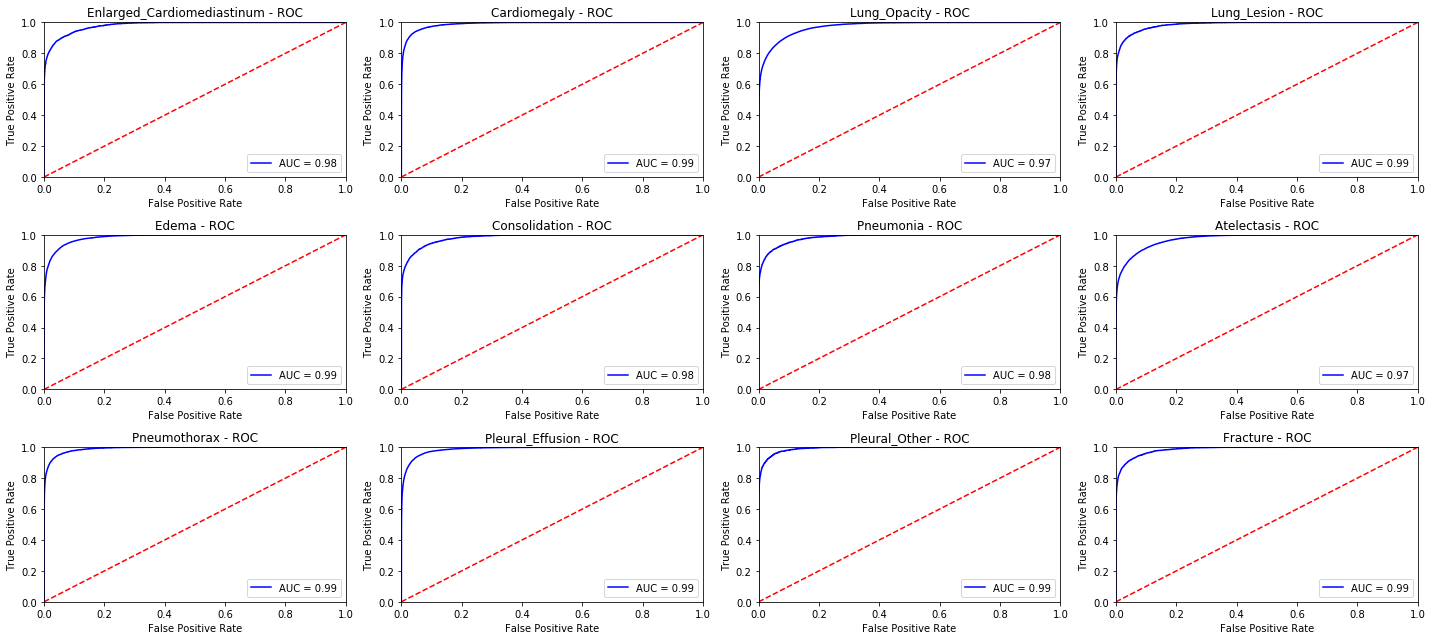

***** Precision / Recall *****


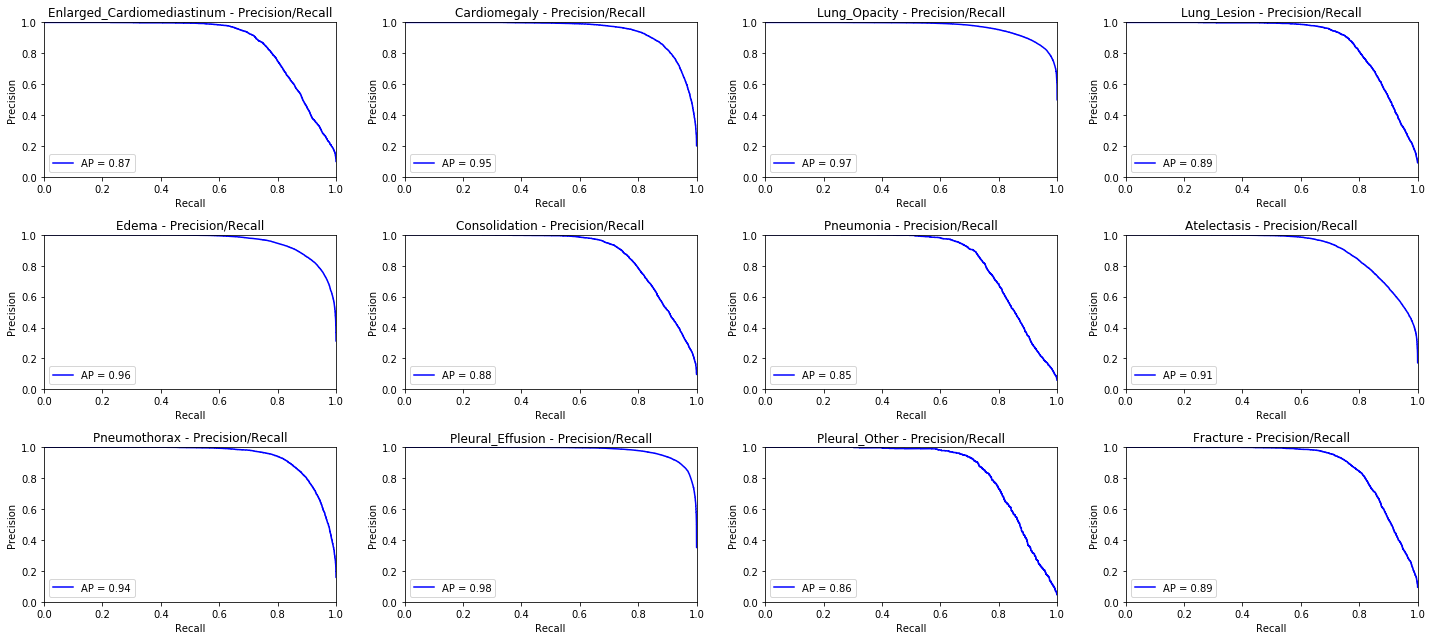


VALIDATION

▔▔▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.201232
Hamming Loss,0.130335
Combined Recall,0.363695
Combined Precision,0.392433
Combined F1,0.350441


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,1364,0.073314,0.223214,0.110375,0.599949,0.101699
1,Cardiomegaly,2958,0.458080,0.456536,0.457307,0.810896,0.436341
2,Lung_Opacity,11811,0.679621,0.571195,0.620708,0.675904,0.595570
3,Lung_Lesion,1156,0.095156,0.270270,0.140755,0.687645,0.125529
4,Edema,6107,0.366792,0.544218,0.438228,0.775083,0.494979
5,Consolidation,1537,0.091087,0.155556,0.114895,0.647001,0.102697
6,Pneumonia,706,0.049575,0.142857,0.073607,0.648320,0.060621
7,Atelectasis,4139,0.234115,0.267532,0.249710,0.625881,0.232401
8,Pneumothorax,2056,0.427043,0.373617,0.398547,0.811211,0.357170
9,Pleural_Effusion,8929,0.589988,0.712084,0.645311,0.837647,0.724722


***** ROC *****


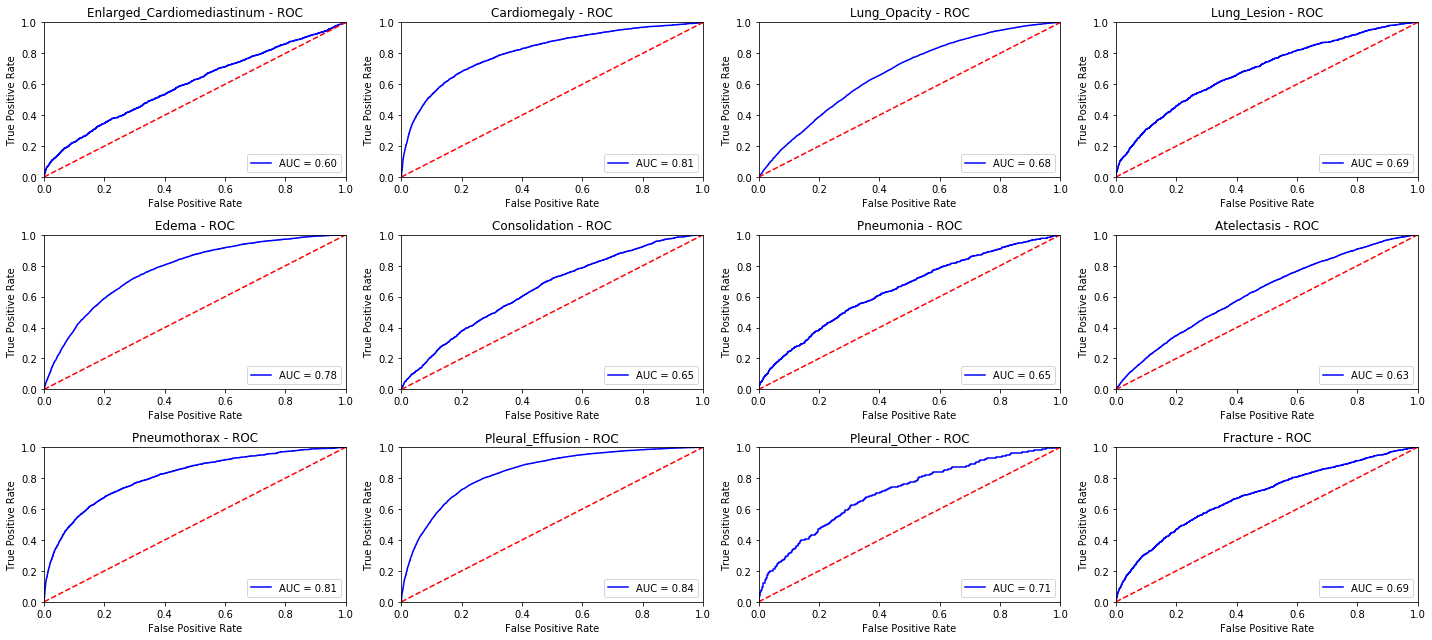

***** Precision / Recall *****


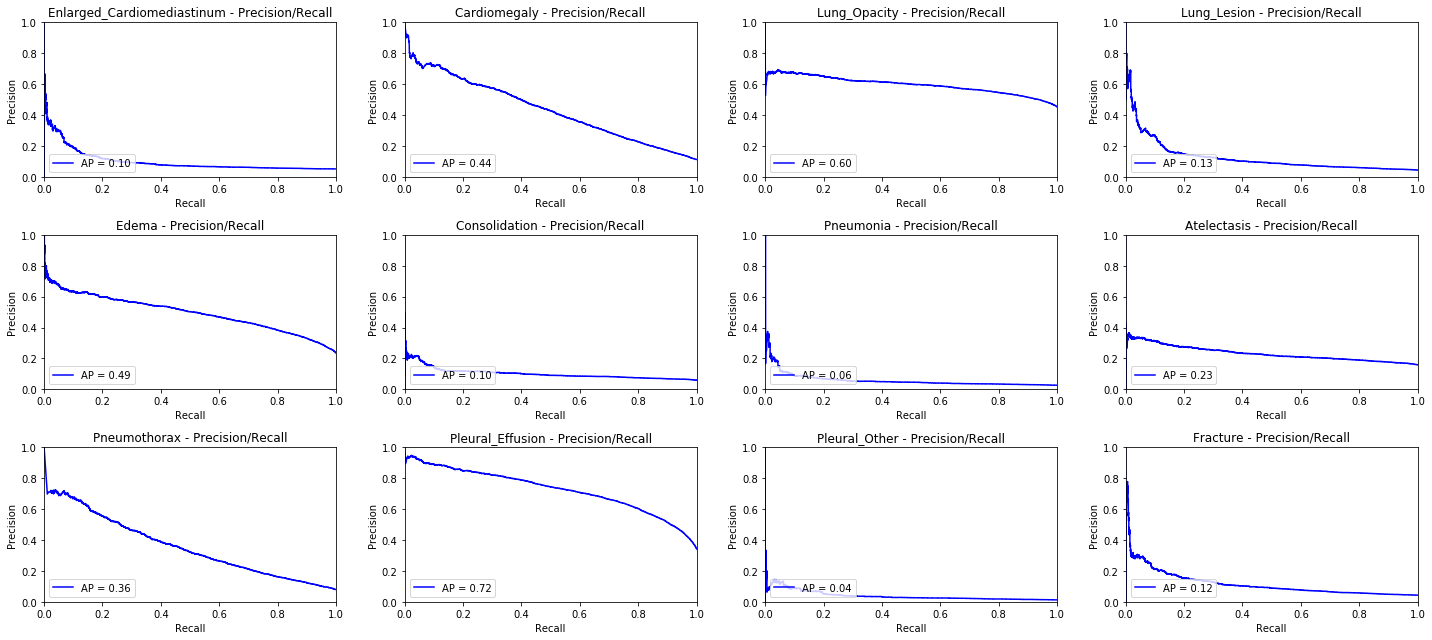

In [7]:
standardTraining.displayMetrics()